Populating the interactive namespace from numpy and matplotlib


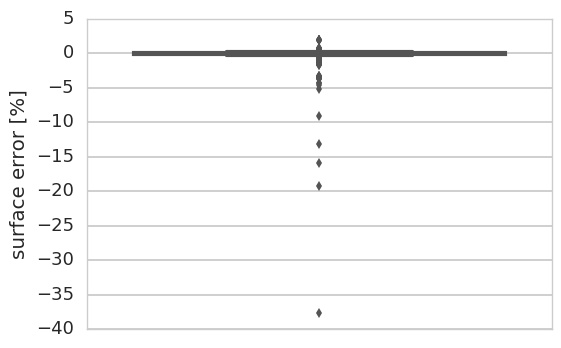

190/1753


In [52]:
%run evaltools.ipynb

In [53]:
datapath
df = read_data(datapath)

# this is going to remove unwanted data from the dataset

# df = select_df(df, older_than="2017-10-03 23:00", note="mix 2 cylinder surface + sphere error", remove=True, print_log=True)
df = select_df(df, older_than="2017-10-03 23:00", note_contains="mix 2", remove=True, print_log=True)

788/1753


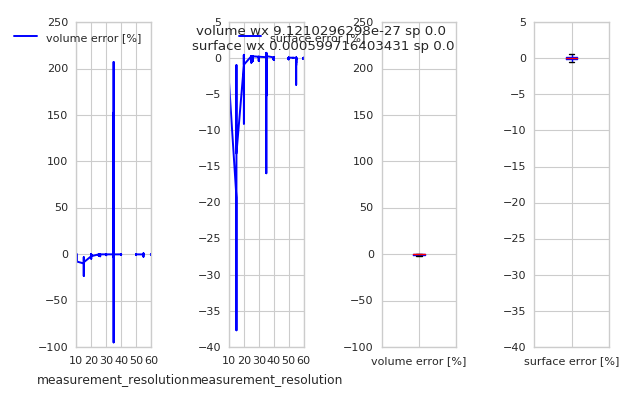

In [54]:
df_error = show_error(df)

In [31]:
list_filter(df.keys(), contain="note")

['config output note']

# Wilcox a Spearman 

In [55]:
data = {
    "config output note": [],
    "volume wilcoxon": [],
    "volume spearman": [],
    "surface wilcoxon": [],
    "surface spearman": [],
    "number of samples": []
}
for note in np.unique(df["config output note"]):
    dfs = df[df["config output note"] == note]
    vw, vs, sw, ss = statistic_tests(dfs)
    data["config output note"].append(note)
    data["volume wilcoxon"].append(vw.pvalue)
    data["volume spearman"].append(vs.pvalue)
    data["surface wilcoxon"].append(sw.pvalue)
    data["surface spearman"].append(ss.pvalue)
    data["number of samples"].append(len(dfs))
#     show_error(dfs, radius_method=note)
    
pd.DataFrame(data)

,config output note,number of samples,surface spearman,surface wilcoxon,volume spearman,volume wilcoxon
0,NaN,0,NaN,NaN,NaN,NaN
1,compensation method 5 tubes cylinder surface +...,36,NaN,NaN,NaN,NaN
2,compensation method 5 tubes cylinder surface +...,36,NaN,NaN,NaN,NaN
3,compensation method 5 tubes cylinder volume + ...,36,NaN,NaN,NaN,NaN
4,element number cylinder volume + sphere error,65,4.093895e-09,2.305768e-12,4.093895e-09,1.885319e-09
5,element number inscribed,67,6.125159e-10,1.073146e-12,6.125159e-10,1.073146e-12
6,generated volume element_number anisotropic in...,20,0.000000e+00,8.732638e-05,0.000000e+00,8.732638e-05
7,generated volume isotropy inscribed,20,0.000000e+00,8.732638e-05,0.000000e+00,8.732638e-05
8,generated volume length inscribed,20,0.000000e+00,8.732638e-05,0.000000e+00,8.732638e-05
9,generated volume noise inscribed,20,NaN,7.744216e-06,NaN,7.744216e-06


In [ ]:
select_df(df)
note = "element number inscribed"
    dfs = df[df[note_key]]
    dfs = newer_data(dfs, date)

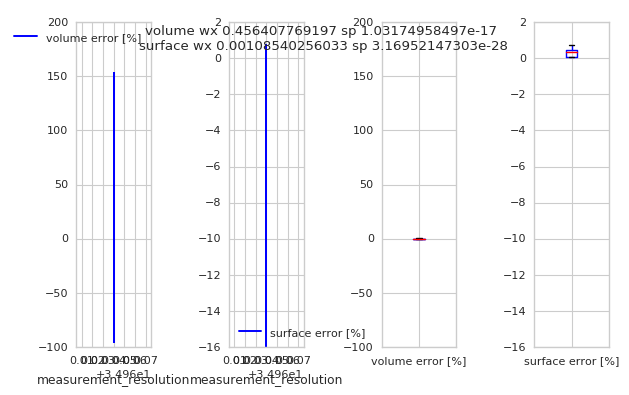

In [17]:

df_graph = show_error(select_df(df, "mix 4 cylinder surface + sphere error"))

# Object number

41/67
0/0
0/0
0/0
42/65
0/0
0/0
0/0
0/0
0/0
0/0
0/0


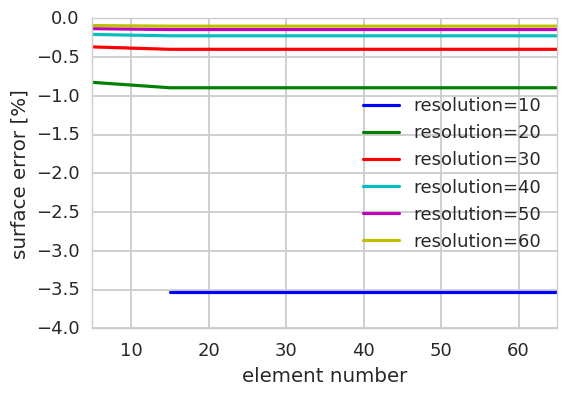

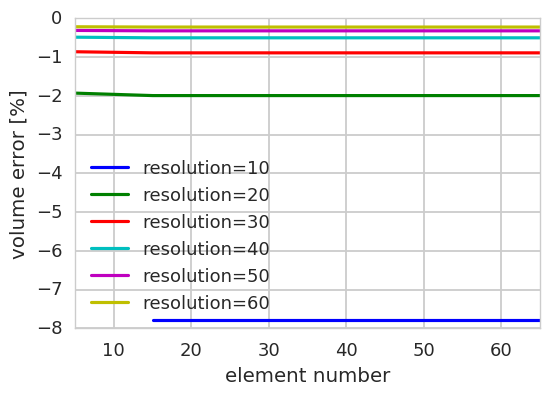

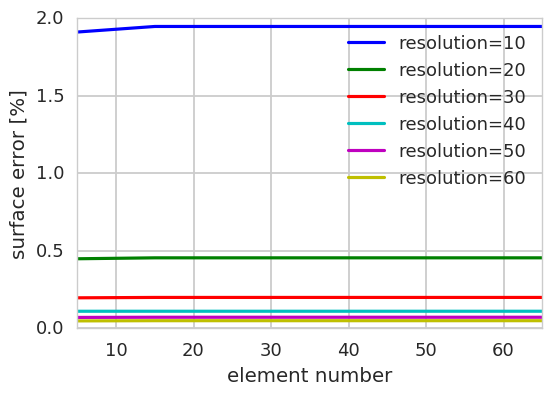

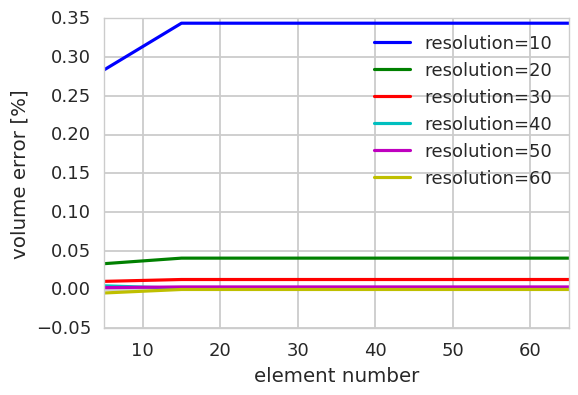

In [6]:
dpi = 400
date = "2017-10-03 21:00"
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    l1 = len(dfs)
    dfs = newer_data(dfs, date)
    print("{}/{}".format(len(dfs), l1))
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")
    sns.set_context("talk")
    fig, ax = plt.subplots(
#         figsize=(5,3)
    )
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_surface_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=dpi)
    
    # volume
    ykey="volume error [mm^3]"
    ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(
#         figsize=(5,3)
    )
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_volume_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=dpi)

In [7]:
dfs["volume error [%]"]

Series([], Name: volume error [%], dtype: float64)

In [8]:
# df

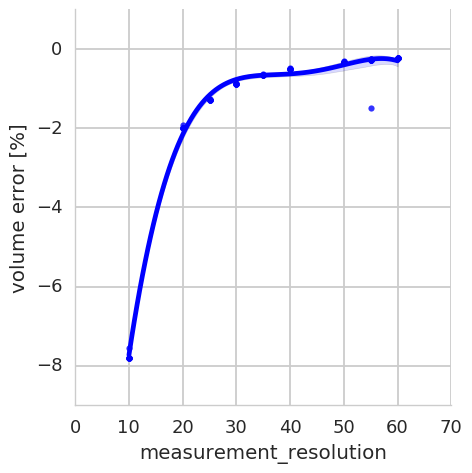

In [9]:
radius_method = "inscribed"
dfs = df[
    df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
k1 = "volume error [%]"
k2 = "measurement_resolution"

k2 in dfs.keys()
sns.lmplot(y=k1, x=k2, data=dfs, order=4, 
           truncate=True
           
#            logx=True
          )

# Error and measurement resolution

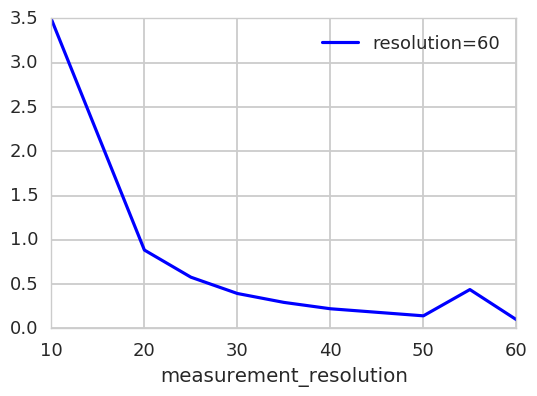

In [10]:
# zip(list(dfs_group))

xkey="measurement_resolution"
ykey="surface error [%]"
dfs_group = dfs[["surface error [%]", "measurement_resolution" ]].sort_values(by="measurement_resolution")#.groupby(by="measurement_resolution")
# .plot(x="element_number")
sns.set_context("talk")
dfs_group.groupby(by="measurement_resolution").mean().abs().reset_index().plot(x=xkey, y=ykey, label="resolution={}".format(label))
# dfs_group.plot(x=xkey, y=ykey)

# Porosity

http://home.zcu.cz/~mjirik/lisa/teigen/teigen_porosity_001.zip

# Volume fraction data

In [11]:
dfs = df[
    df[note_key] == "volume fraction overlap inscribed"
]
# np.unique(df[note_key])
dfs["numeric volume [mm^3]"]
print(list_filter(dfs.keys(), contain="area"))

# print(list_filter(dfs.keys(), contain="frac"))
volume_fraction = dfs["numeric volume [mm^3]"] / dfs["measurement area volume [mm^3]"]
print(volume_fraction)

['config areasampling areasize_mm', 'config areasampling areasize_px', 'config areasampling voxelsize_mm', 'measurement area volume [mm^3]']
3027    0.069582
3347    0.091288
3359    0.127390
3361    0.340469
4389    0.014082
4390    0.014082
dtype: float64


## volume fraction 38% 

ke stažení [zde](http://home.zcu.cz/~mjirik/lisa/teigen/teigen_volume_fraction_overlap__001.zip)

![fig](http://github.com/mjirik/teigen/blob/master/graphics/teigen_volume_fraction_34.png?raw=true)